# Load and Parse JSON Data
Use json module to load the polygon data and extract the image filename, segmentation coordinates, and confidence score.

In [ ]:
import json
import os

data_file_path = 'output/segmentations_20250311.json'

# Load the JSON data from the file
with open(data_file_path) as f:
    data = json.load(f)
    data = data[0] # just get the first image as an example

# Extract the image filename, segmentation coordinates, and confidence score
image_filename = data['image']
segmentation_coords = data['segmentation']
confidence_score = data['confidence_score']

# Print the extracted data for verification
print(f"Image Filename: {image_filename}")
print(f"Segmentation Coordinates: {segmentation_coords}")
print(f"Confidence Score: {confidence_score}")

Image Filename: 1738856794439.jpg
Segmentation Coordinates: [76, 159, 77, 160, 76, 161, 78, 163, 78, 164, 80, 166, 80, 167, 87, 174, 88, 174, 90, 176, 91, 176, 92, 177, 93, 177, 94, 178, 102, 178, 103, 177, 104, 177, 105, 176, 106, 176, 107, 175, 108, 175, 109, 174, 110, 174, 111, 173, 112, 173, 112, 167, 111, 166, 111, 163, 109, 161, 109, 160, 106, 160, 105, 159, 105, 160, 104, 161, 102, 159, 101, 160, 98, 160, 97, 161, 96, 160, 93, 160, 92, 161, 91, 160, 90, 161, 89, 160, 87, 160, 86, 159, 85, 159, 84, 158, 81, 158, 80, 157, 78, 157]
Confidence Score: 0.6875


# Load and Display Image
Use PIL or opencv-python to load and display the source image using matplotlib.

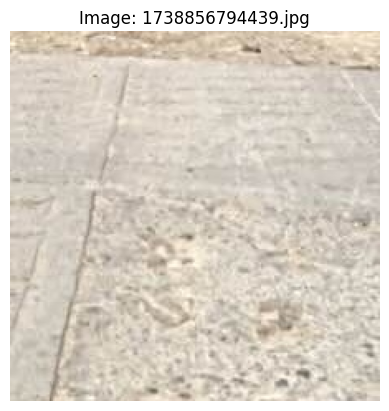

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path = f'input/test_images/{image_filename}'

# Load the image using matplotlib
img = mpimg.imread(img_path)

# Display the image
plt.imshow(img)
plt.title(f"Image: {image_filename}")
plt.axis('off')  # Hide the axis
plt.show()

# Convert Segmentation Points to Polygon
Convert the segmentation array into numpy arrays of x,y coordinates and create a matplotlib polygon patch.

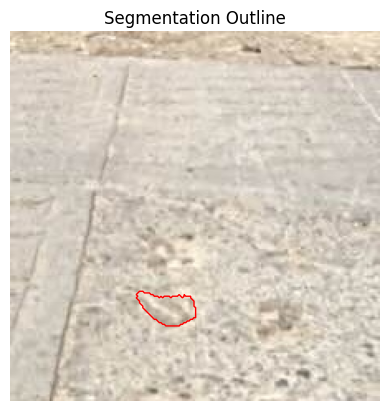

In [3]:
import numpy as np
import matplotlib.patches as patches

# Convert the segmentation array into numpy arrays of x, y coordinates
segmentation_coords = np.array(segmentation_coords).reshape(-1, 2)
x_coords, y_coords = segmentation_coords[:, 0], segmentation_coords[:, 1]

# Create a matplotlib polygon patch
polygon = patches.Polygon(segmentation_coords, closed=True, edgecolor='r', facecolor='none')

# Display the image with the polygon overlay
fig, ax = plt.subplots()
ax.imshow(img)
ax.add_patch(polygon)
plt.title(f"Segmentation Outline")
plt.axis('off')  # Hide the axis
plt.show()

# Overlay Segmentation on Image
Create a matplotlib figure and add the polygon overlay on top of the image with semi-transparency.

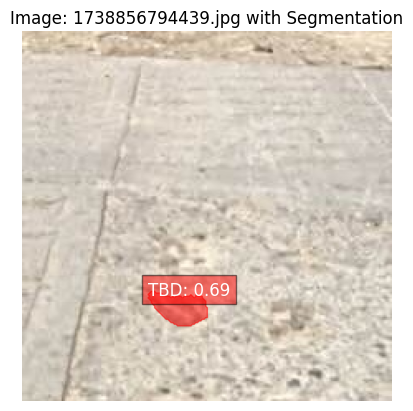

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import matplotlib.patches as patches

# Load the image using matplotlib
img = mpimg.imread(img_path)

# Convert the segmentation array into numpy arrays of x, y coordinates
segmentation_coords = np.array(segmentation_coords).reshape(-1, 2)
x_coords, y_coords = segmentation_coords[:, 0], segmentation_coords[:, 1]
# Add text annotation showing the confidence score and class label
class_label = data['class']
confidence_score = data['confidence_score']

# Create a matplotlib polygon patch with semi-transparency
polygon = patches.Polygon(segmentation_coords, closed=True, edgecolor='r', facecolor='r', alpha=0.5)

# Display the image with the polygon overlay
fig, ax = plt.subplots()
ax.imshow(img)
ax.add_patch(polygon)
plt.title(f"Image: {image_filename} with Segmentation")
plt.axis('off')  # Hide the axis

# Add text annotation for confidence score and class label
text_x, text_y = x_coords[0], y_coords[0]  # Position the text at the first coordinate of the segmentation
ax.text(text_x, text_y, f"{class_label}: {confidence_score:.2f}", color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

plt.show()